# Panda Basics 101 : DataFrames
DataFrames (DF) : Creation
 <code>class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)</code>

Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

In [1]:
#basic imports
import pandas as pd
import numpy  as np

## Create DF From List

In [2]:
df = pd.DataFrame([1,2,3,4,5])
df

,0
0,1
1,2
2,3
3,4
4,5


## Create DF From List of Lists

In [3]:
df = pd.DataFrame([[1,2,3,4,5],[10,20,30,40,50], [100,120,130,140,150]])
df

,0,1,2,3,4
0,1,2,3,4,5
1,10,20,30,40,50
2,100,120,130,140,150


In [4]:
# provide column labels- must be enough
df = pd.DataFrame([[1,2,3,4,5],[10,20,30,40,50], 
                   [100,120,130,140,150]], 
                    columns=list("ABCDE"))
df

,A,B,C,D,E
0,1,2,3,4,5
1,10,20,30,40,50
2,100,120,130,140,150


## Create DF From Dict

In [5]:
#keys = column names  - if val = array, must be same size
df = pd.DataFrame( {"foo": [1,2,3,4], "bar":[9,8,7,6], 'baz':[12,13,14,15] } )
df

,foo,bar,baz
0,1,9,12
1,2,8,13
2,3,7,14
3,4,6,15


## Create DF using random decimals and integers (good for experimenting)

## Generate Random Decimals in range -1 to 1 using random.randn(rows,cols) 

In [6]:
df = pd.DataFrame(np.random.randn(5, 4), columns=list('ABCD'))
df

,A,B,C,D
0,-0.908119,0.342263,-1.765096,-0.138919
1,1.759536,-0.030853,0.148568,-0.595394
2,-0.029925,-1.520034,0.681851,-1.310278
3,0.700499,-1.014862,-0.281576,-0.736767
4,1.382906,0.354815,0.297011,-0.101261


## Generate Random Integers using: randint(low,hi,size=(rows,cols))

In [7]:
df = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),
                  columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,4,8,3,3,1
1,0,2,2,8,1
2,7,2,1,0,6
3,2,3,3,3,0
4,7,3,1,7,6


## Create DF From CSV File

In [8]:
df = pd.read_csv('worldcup.csv')
df.head()

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance
0,wc1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,18,590549
1,wc1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,17,363000
2,wc1938,1938,France,Italy,Hungary,Brazil,Sweden,84,18,375000
3,wc1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,22,1045246
4,wc1954,1954,Switzerland,GermanyFR,Hungary,Austria,Uruguay,14,26,768607


# Creating New Cols/Rows 
## New Column Creation based on existing column(s)

In [9]:
df['goalsPerMatch'] = df['goalsScored']/df['matchesPlayed']
df.head()

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance,goalsPerMatch
0,wc1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,18,590549,3.888889
1,wc1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,17,363000,4.117647
2,wc1938,1938,France,Italy,Hungary,Brazil,Sweden,84,18,375000,4.666667
3,wc1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,22,1045246,4.000000
4,wc1954,1954,Switzerland,GermanyFR,Hungary,Austria,Uruguay,14,26,768607,0.538462


In [10]:
# sort on this value - creates a copy 
df2 = df.sort_values(by='goalsPerMatch', ascending=False)
df2.head()


,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance,goalsPerMatch
2,wc1938,1938,France,Italy,Hungary,Brazil,Sweden,84,18,375000,4.666667
1,wc1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,17,363000,4.117647
3,wc1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,22,1045246,4.000000
0,wc1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,18,590549,3.888889
5,wc1958,1958,Sweden,Brazil,Sweden,France,GermanyFR,126,35,819810,3.600000


## Applying functions to DataFrames for each row or column
When we df.apply(fn, axis= ) a Python function to a DataFrame, each row (axis=0) or col (axis=1) is passed as a parameter to the function and a new DataFrame is created. <br/>
<h4>axis confusion<h4>
* axis=1: All the COLS in each Row
* axis=0: all the ROWS in each COL

In [11]:
df = pd.DataFrame([[1,1,1,1], [100,200,300,400], [1000,2000,3000,4000]], 
                  columns=list('ABCD'))
df

,A,B,C,D
0,1,1,1,1
1,100,200,300,400
2,1000,2000,3000,4000


In [12]:
#axis=1: All the COLS in each Row
#axis=0: all the ROWS in each COL
def addAll(z):
    #the DF will pass either a row or column (a Series) to this function
    return z.sum()

df2 = df.apply(addAll, axis=1)
print (df2)

#now with axis=0  All ROWS for each COL
#note: the column names are now the row indexes
df3 = df.apply(addAll, axis=0)
print (df3)

0        4
1     1000
2    10000
dtype: int64
A    1101
B    2201
C    3301
D    4401
dtype: int64


## Using Boolean DataFrame to select rows from a DataFrame
Creating a boolean index (a single column of true/false) is useful when you want to select  subset of
rows from your DataFrame. The strategy is:
- create new DF based on logical operators over the orginal DF
- use the new boolean DF to select only those rows == True

In [13]:
df = pd.DataFrame([ [2,4,6,8], [6,12,44,67], [6,6,6,26], [3,4,5,6]], 
                  columns=list("abcd"))
df

,a,b,c,d
0,2,4,6,8
1,6,12,44,67
2,6,6,6,26
3,3,4,5,6


In [14]:
#simple boolean expession
dbool = df['a'] >= 6
dbool

0    False
1     True
2     True
3    False
Name: a, dtype: bool

In [15]:
#compound boolean condition  - needs parens around each expression
dbool = (df['a'] >= 6) & (df['d'] > df['a']*2)
dbool

0    False
1     True
2     True
3    False
dtype: bool

In [16]:
#apply boolean to original DF
df3 = df[dbool]
df3

,a,b,c,d
1,6,12,44,67
2,6,6,6,26


# Panda Selection and Slicing from Existing DF

In [17]:
# set up a dataframe
df = pd.DataFrame(np.random.randint(0,100,size=(5, 5)), columns=list('abcde'))
df


,a,b,c,d,e
0,4,46,24,79,51
1,64,17,35,83,81
2,21,79,93,73,22
3,58,44,10,95,52
4,56,3,74,65,2


## Select Column or Columns from DF
Index refers to entire column (unlike Python Dict)
Note: When selecting a single column or row, a <b>Series</b> is returned

### Select Single Column (as Series)

In [18]:
df2 = df['b']
print (df2)
print (type(df2))

0    46
1    17
2    79
3    44
4     3
Name: b, dtype: int32
<class 'pandas.core.series.Series'>


### Select Multiple Columns (as DataFrame) - pass List

In [19]:
df3 = df[ ['a','c','e'] ]
df3


,a,c,e
0,4,24,51
1,64,35,81
2,21,93,22
3,58,10,52
4,56,74,2


###  Selecting Single row and single data item using .iloc

In [20]:
# show our DF
df

,a,b,c,d,e
0,4,46,24,79,51
1,64,17,35,83,81
2,21,79,93,73,22
3,58,44,10,95,52
4,56,3,74,65,2


### df.iloc  expects a numeric index - refers to row
Single integer returns the row

In [21]:
#single index value -> row
df.iloc[2]

a    21
b    79
c    93
d    73
e    22
Name: 2, dtype: int32

### df.iloc with a list of labels -- returns multiple rows

In [22]:
df.iloc[ [1,3,4]]

,a,b,c,d,e
1,64,17,35,83,81
3,58,44,10,95,52
4,56,3,74,65,2


### Single Data item with .iloc [row,col] -> yields single value

In [23]:
df.iloc[1,2]

35

### Rows and Columns with df.iloc and numeric slice ranges [1:3,2:4]

In [24]:
# use : for all rows
df.iloc[:,2:5]

,c,d,e
0,24,79,51
1,35,83,81
2,93,73,22
3,10,95,52
4,74,65,2


In [25]:
# range over rows and cols with integer indexes
df.iloc[2:4,2:4]

,c,d
2,93,73
3,10,95


## Selecting with Labels using df.loc

In [26]:
# show df
df

,a,b,c,d,e
0,4,46,24,79,51
1,64,17,35,83,81
2,21,79,93,73,22
3,58,44,10,95,52
4,56,3,74,65,2


In [27]:
# one parameter gives us the entire row. (note: row label is an integer)
# Sanity check:  df[2]      -> column 2 ( if such a label exists)
#                df.loc[2] -> row  with 'label 2' - not the second in series
print (df.loc[2])

a    21
b    79
c    93
d    73
e    22
Name: 2, dtype: int32


In [28]:
# two parameters give single element
df.loc[2,'b']

79

In [29]:
# range of values
df.loc[2:4, 'c':'e']

,c,d,e
2,93,73,22
3,10,95,52
4,74,65,2


## Select based on column value using in or .isin
Pandas isin() method is used to filter data frames. isin() method helps in selecting rows with having a single or multiple values in a particular column. 

In [30]:
df = pd.read_csv('worldcup.csv')
df

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance
0,wc1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,18,590549
1,wc1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,17,363000
2,wc1938,1938,France,Italy,Hungary,Brazil,Sweden,84,18,375000
3,wc1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,22,1045246
4,wc1954,1954,Switzerland,GermanyFR,Hungary,Austria,Uruguay,14,26,768607
5,wc1958,1958,Sweden,Brazil,Sweden,France,GermanyFR,126,35,819810
6,wc1962,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,32,893172
7,wc1966,1966,England,England,GermanyFR,Portugal,Soviet_Union,89,32,1563135
8,wc1970,1970,Mexico,Brazil,Italy,GermanyFR,Uruguay,95,32,1603975
9,wc1974,1974,Germany,GermanyFR,Netherlands,Poland,Brazil,97,38,1865753


In [31]:
#create a bool series
newdf = df['first'].isin(['Brazil'])
#use to filter
df[newdf]

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance
5,wc1958,1958,Sweden,Brazil,Sweden,France,GermanyFR,126,35,819810
6,wc1962,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,32,893172
8,wc1970,1970,Mexico,Brazil,Italy,GermanyFR,Uruguay,95,32,1603975
14,wc1994,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,52,3587538
16,wc2002,2002,Korea_Japan,Brazil,Germany,Turkey,KoreaRepublic,161,64,2705197


In [32]:
newdf = df['first'].isin(['Brazil', 'France'])
#use to filter
df[newdf]

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance
5,wc1958,1958,Sweden,Brazil,Sweden,France,GermanyFR,126,35,819810
6,wc1962,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,32,893172
8,wc1970,1970,Mexico,Brazil,Italy,GermanyFR,Uruguay,95,32,1603975
14,wc1994,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,52,3587538
15,wc1998,1998,France,France,Brazil,Croatia,Netherlands,171,64,2785100
16,wc2002,2002,Korea_Japan,Brazil,Germany,Turkey,KoreaRepublic,161,64,2705197
20,wc2018,2018,Russia,France,Croatia,Belgium,England,169,64,3430000


# Get and set single values from DataFrame with .at and .iat

## Get/Set with .at (using labels  - not indexes)

In [33]:
# set up a dataframe
df = pd.DataFrame(np.random.randint(0,100,size=(5, 5)), columns=list('abcde'))
df

,a,b,c,d,e
0,97,45,94,51,32
1,39,38,70,76,40
2,68,57,20,42,36
3,73,14,1,35,38
4,81,28,74,23,41


In [34]:
# get value
df.at[1,'c']

70

In [35]:
# set value
df.at[1,'c'] = 1002
df

,a,b,c,d,e
0,97,45,94,51,32
1,39,38,1002,76,40
2,68,57,20,42,36
3,73,14,1,35,38
4,81,28,74,23,41


## Get/Set with .iat (using integer indexes)

In [36]:
df.iat[3,3]


35

In [37]:
df.iat[3,3] = 3333
df

,a,b,c,d,e
0,97,45,94,51,32
1,39,38,1002,76,40
2,68,57,20,42,36
3,73,14,1,3333,38
4,81,28,74,23,41


# Sorting

In [38]:
#set up 
df = pd.DataFrame({
  'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
  'col2' : [2, 1, 9, 8, 7, 4],
  'col3': [0, 1, 9, 4, 2, 3],
 })
df

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
3,NaN,8,4
4,D,7,2
5,C,4,3


In [39]:
df.sort_values(by=['col1'])


,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


In [40]:
#sort multiple columns
df.sort_values(by=['col1', 'col2'])

,col1,col2,col3
1,A,1,1
0,A,2,0
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


In [41]:
#sort multiple columns -  DESCENDING
df.sort_values(by=['col1', 'col2'], ascending=False)

,col1,col2,col3
4,D,7,2
5,C,4,3
2,B,9,9
0,A,2,0
1,A,1,1
3,NaN,8,4


In [42]:
# Put NAs first
df.sort_values(by=['col1', 'col2'], ascending=False, na_position='first')

,col1,col2,col3
3,NaN,8,4
4,D,7,2
5,C,4,3
2,B,9,9
0,A,2,0
1,A,1,1


# Ploting
Easy to plot one column vs another
Include 
'%matplotlib inline' to get Jupyter to plot 

pandas vs matplotlib

Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion.
Which .plot do I use?

When you use .plot on a dataframe, you sometimes pass things to it and sometimes you don’t.

    .plot plots the index against every column
    .plot(x='col1') plots against a single specific column
    .plot(x='col1', y='col2') plots one specific column against another specific column


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
#load data
df = pd.read_csv('worldcup.csv')
df.head()

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance
0,wc1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,18,590549
1,wc1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,17,363000
2,wc1938,1938,France,Italy,Hungary,Brazil,Sweden,84,18,375000
3,wc1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,22,1045246
4,wc1954,1954,Switzerland,GermanyFR,Hungary,Austria,Uruguay,14,26,768607


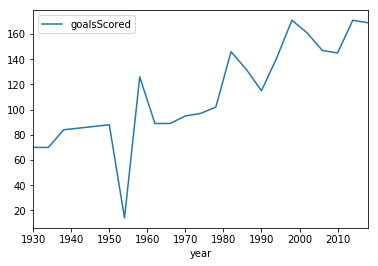

In [52]:
df.plot(y='goalsScored', x='year')

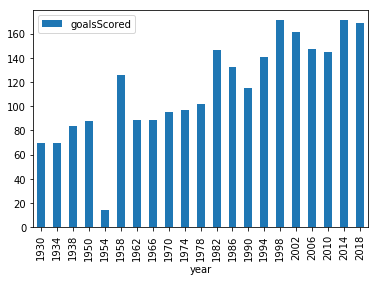

In [53]:
df.plot(y='goalsScored', x='year', kind='bar')

## Create JSON from columns (default)

In [57]:
s = df.to_json()
print (s)

{"a":{"r1":10,"r2":11,"r3":16,"r4":12,"r5":0},"b":{"r1":17,"r2":6,"r3":4,"r4":13,"r5":0},"c":{"r1":1,"r2":11,"r3":8,"r4":5,"r5":3},"d":{"r1":5,"r2":11,"r3":1,"r4":9,"r5":16},"e":{"r1":3,"r2":15,"r3":9,"r4":1,"r5":2}}


## Create JSON from rows using  orient='index'

In [58]:
s = df.to_json(orient='index')
print (s)

{"r1":{"a":10,"b":17,"c":1,"d":5,"e":3},"r2":{"a":11,"b":6,"c":11,"d":11,"e":15},"r3":{"a":16,"b":4,"c":8,"d":1,"e":9},"r4":{"a":12,"b":13,"c":5,"d":9,"e":1},"r5":{"a":0,"b":0,"c":3,"d":16,"e":2}}
